In [1]:
#plotting imports
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings("ignore")


#modeling imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#pipeline modules
from acquire import get_titanic_data
from prepare_notebook import prep_titanic

In [2]:

df=prep_titanic(get_titanic_data())
df.dropna(inplace=True)
df.isnull().sum()

passenger_id    0
survived        0
pclass          0
sex             0
age             0
sibsp           0
parch           0
fare            0
embarked        0
class           0
embark_town     0
alone           0
dtype: int64

In [3]:
X=df[['pclass','age','fare','sibsp','parch']]
y=df[['survived']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=123)
X_train.head()

,pclass,age,fare,sibsp,parch
60,3,0.271174,0.014110,0,0
348,3,0.032420,0.031035,1,1
606,3,0.371701,0.015412,0,0
195,1,0.723549,0.285990,0,0
56,2,0.258608,0.020495,0,0


In [4]:
logit=LogisticRegression(C=1,class_weight={1:2},random_state=123,solver='saga')
logit.fit(X_train,y_train)

LogisticRegression(C=1, class_weight={1: 2}, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=123, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [5]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-1.06836414 -1.9727291   0.79910148 -0.27300495  0.40904858]]
Intercept: 
 [3.3184823]


In [6]:
y_pred = logit.predict(X_train)
y_pred_proba=logit.predict_proba(X_train)

y_pred_proba

array([[0.6011566 , 0.3988434 ],
       [0.44762357, 0.55237643],
       [0.64738422, 0.35261578],
       [0.25897796, 0.74102204],
       [0.33448517, 0.66551483],
       [0.58294606, 0.41705394],
       [0.60685253, 0.39314747],
       [0.19441232, 0.80558768],
       [0.17362731, 0.82637269],
       [0.52455931, 0.47544069],
       [0.16247945, 0.83752055],
       [0.58295236, 0.41704764],
       [0.15087653, 0.84912347],
       [0.58119018, 0.41880982],
       [0.37698269, 0.62301731],
       [0.59260952, 0.40739048],
       [0.44364017, 0.55635983],
       [0.63722058, 0.36277942],
       [0.63909002, 0.36090998],
       [0.06179714, 0.93820286],
       [0.29721402, 0.70278598],
       [0.38490873, 0.61509127],
       [0.51995819, 0.48004181],
       [0.60682618, 0.39317382],
       [0.6008496 , 0.3991504 ],
       [0.6127725 , 0.3872275 ],
       [0.35601313, 0.64398687],
       [0.33547693, 0.66452307],
       [0.07865925, 0.92134075],
       [0.64761412, 0.35238588],
       [0.

In [7]:
print('Accuracy of Logistic regression on training set: {:.2f}'.format(logit.score(X_train,y_train)))

Accuracy of Logistic regression on training set: 0.69


In [8]:
print(confusion_matrix(y_train,y_pred))

[[190 103]
 [ 50 156]]


In [9]:
c_mat=confusion_matrix(y_train,y_pred)

In [10]:
false_positive=c_mat[0,1]
true_negative=c_mat[0,0]
false_negative=c_mat[1,0]
true_positive=c_mat[1,1]

In [11]:
#compare this to what was produced from score method
accuracy=((true_negative+true_positive)/len(y_train))
accuracy

0.6933867735470942

In [12]:
#1-accuracy
classification_error=((false_positive+false_negative)/len(y_train))
classification_error

0.3066132264529058

In [13]:
#also called true positive rate
recall=true_positive/(true_positive+false_negative)
recall

0.7572815533980582

In [14]:
precision=true_positive/(true_positive+false_positive)
precision

0.6023166023166023

In [15]:
f1_score=(recall+precision)/2
f1_score

0.6797990778573303

In [16]:
false_positive_rate=false_positive/(false_positive+true_negative)
false_positive_rate

0.3515358361774744

In [17]:
cr=(classification_report(y_train,y_pred,output_dict=True))
#print(cr["0"])
#print(cr["1"])

In [18]:
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'.format(logit.score(X_test,y_test)))

Accuracy of Logistic Regression classifier on test set: 0.67


In [19]:
y_pred_proba=[i[1] for i in y_pred_proba]

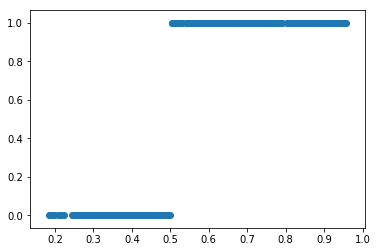

In [20]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(y_pred_proba,y_pred)
plt.show()

Let's us a decision tree to solve a classification problem

In [21]:
import pandas as pd
from pydataset import data
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from pydataset import data

In [22]:
df_iris=data('iris')
df_iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [23]:
df_iris.columns=[col.lower().replace('.','_') for col in df_iris]

In [24]:
df_iris.head()
X=df_iris.drop(['species'],axis=1)
y=df_iris[['species']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=123)

In [25]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=123)

In [26]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [27]:
y_pred=clf.predict(X_train)
y_pred_proba=clf.predict_proba(X_train)
y_pred_proba
#y_pred

array([[0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.975, 0.025],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.975, 0.025],
       [0.   , 0.975, 0.025],
       [0.   , 0.975, 0.025],
       [0.   , 0.975, 0.025],
       [0.   , 0.   , 1.   ],
       [0.   , 0.975, 0.025],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.975, 0.025],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.975, 0.025],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.975, 0.025],
       [0.   , 0.975, 0.025],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.975, 0.025],
       [0.   , 0.975, 0.025],
       [1.   , 0.   , 0.   ],
       [0.

In [28]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train,y_train)))

Accuracy of Decision Tree classifier on training set: 0.98


In [29]:
confusion_matrix(y_train,y_pred)

array([[32,  0,  0],
       [ 0, 40,  0],
       [ 0,  2, 31]])

In [30]:
#Making the confusion matrix "pretty"
labels=sorted(y_train.species.unique())
pretty_cr=pd.DataFrame(confusion_matrix(y_train,y_pred),index=labels,columns=labels)